In [71]:
#Gold ETF stock price prediction

In [97]:
#!pip install tensorflow
#!pip install keras
#!pip install pandas-datareader
import tensorflow
import keras
#!pip install pandas
import pandas
import numpy

In [98]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [99]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2020, 7, 31)

In [100]:
gld = web.DataReader("GLD", 'yahoo', start, end)

In [101]:
gld.to_csv('GLD.csv')

In [102]:
gld.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,156.300003,154.550003,154.759995,155.919998,13385800,155.919998
2012-01-04,157.380005,155.339996,155.429993,156.710007,11549700,156.710007
2012-01-05,158.029999,155.250000,155.369995,157.779999,11621600,157.779999
2012-01-06,158.630005,156.380005,158.589996,157.199997,9790500,157.199997
2012-01-09,157.589996,156.190002,157.360001,156.500000,8771900,156.500000
2012-01-10,159.470001,158.470001,158.970001,158.639999,8371400,158.639999
2012-01-11,160.050003,158.910004,159.339996,159.669998,7968500,159.669998
2012-01-12,161.619995,159.830002,161.020004,160.380005,8602500,160.380005
2012-01-13,159.589996,158.009995,159.320007,159.259995,8910300,159.259995


In [103]:
gld.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2159.000000,2159.000000,2159.000000,2159.000000,2.159000e+03,2159.000000
mean,130.320139,129.192978,129.763196,129.768731,8.882411e+06,129.768731
std,18.041996,17.774175,17.918821,17.941897,5.255092e+06,17.941897
min,100.989998,100.230003,100.919998,100.500000,1.501600e+06,100.500000
25%,118.009998,117.170002,117.575001,117.580002,5.564500e+06,117.580002
50%,124.089996,123.250000,123.699997,123.650002,7.694800e+06,123.650002
75%,140.635002,139.325005,140.125000,140.129997,1.072710e+07,140.129997
max,186.139999,184.169998,184.509995,185.429993,9.380420e+07,185.429993


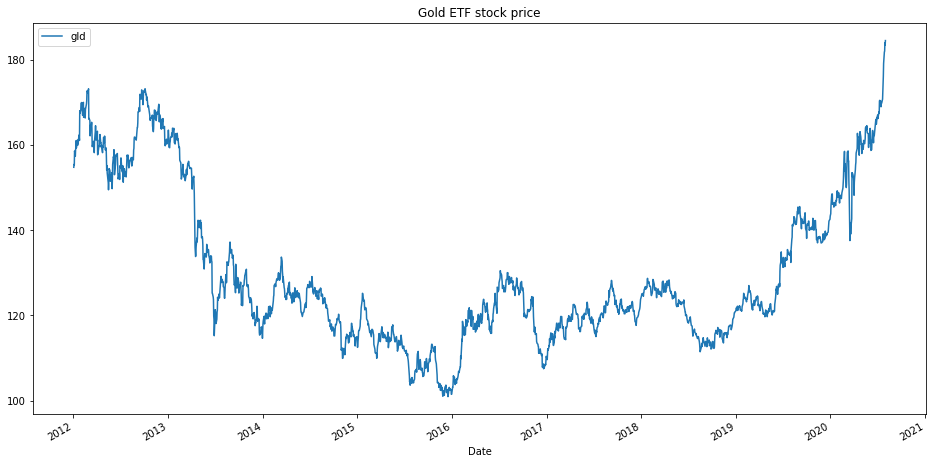

In [104]:
plt.figure(figsize = (16,8))
gld['Open'].plot(label = 'gld')

plt.title('Gold ETF stock price')
plt.legend()

In [105]:
#We are going to predict the price of one Gold ETF below. Similarly all other predictions can also be made. Let us chose Axisgold ETF

In [112]:
# Select Adjusted close data
data = gld[['Adj Close']]
print(data.shape)
data[-20:]

(2159, 1)


,Adj Close
Date,
2020-07-06,167.979996
2020-07-07,169.039993
2020-07-08,170.089996
2020-07-09,169.630005
2020-07-10,169.190002
2020-07-13,169.399994
2020-07-14,170.190002
2020-07-15,170.339996
2020-07-16,168.729996


In [113]:
#Split data 80% training 20% testing

training_size=int(len(data)*0.8)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size],data[training_size:len(data)]

In [116]:
print(train_data.shape)
print("Scaled training data")
train_data[:-10]

(1727, 1)
Scaled training data


,Adj Close
Date,
2012-01-03,155.919998
2012-01-04,156.710007
2012-01-05,157.779999
2012-01-06,157.199997
2012-01-09,156.500000
...,...
2018-10-22,115.709999
2018-10-23,116.389999
2018-10-24,116.660004


In [117]:
print(test_data.shape)
print("Scaled test data")
print(test_data[:-10])

(432, 1)
Scaled test data
             Adj Close
Date                  
2018-11-12  113.660004
2018-11-13  113.699997
2018-11-14  114.639999
2018-11-15  114.769997
2018-11-16  115.620003
...                ...
2020-07-13  169.399994
2020-07-14  170.190002
2020-07-15  170.339996
2020-07-16  168.729996
2020-07-17  170.119995

[422 rows x 1 columns]


In [118]:
#Data preporcesing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data=scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data=scaler.fit_transform(np.array(test_data).reshape(-1,1))

In [121]:
print(train_data.shape)
print("Scaled training data")
train_data[:10]

(1727, 1)
Scaled training data


array([[0.75803581],
       [0.76884156],
       [0.78347693],
       [0.77554365],
       [0.76596908],
       [0.79524003],
       [0.80932838],
       [0.81903986],
       [0.80372034],
       [0.82068116]])

In [120]:
print(test_data.shape)
print("Scaled test data")
print(test_data[-10:])

(432, 1)
Scaled test data
[[0.79810516]
 [0.82680793]
 [0.86345285]
 [0.88504945]
 [0.90622827]
 [0.95541316]
 [0.97659199]
 [0.99582015]
 [0.97673125]
 [1.        ]]


In [95]:
#Data preporcesing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=scaler.fit_transform(np.array(data).reshape(-1,1))

In [67]:
print(data_scaled)

[[0.65253742]
 [0.6618393 ]
 [0.67443782]
 ...
 [0.99646782]
 [0.98033677]
 [1.        ]]


In [68]:
training_size,test_size

(1727, 432)

In [62]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [20]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
#Moving average coefficients
x_train_ma = x_train
y_train_ma = y_train
x_test_ma = x_test
y_test_ma = y_test

In [22]:
train_pred_ma = []
for i in range(0,x_train_ma.shape[0]):
    a = x_train_ma[len(x_train_ma)-248+i:].sum() + sum(train_pred_ma)
    b = a/248
    train_pred_ma.append(b)

In [23]:
train_rms_ma=np.sqrt(np.mean(np.power((np.array(y_train_ma)-train_pred_ma),2)))
print('\n RMSE value on train set:')
print(train_rms_ma)


 RMSE value on train set:
25.7657820573263


In [24]:
test_pred_ma = []
for i in range(0,x_test_ma.shape[0]):
    c = x_test_ma[len(x_test_ma)-248+i:].sum() + sum(test_pred_ma)
    d = a/248
    test_pred_ma.append(d)

In [25]:
test_rms_ma=np.sqrt(np.mean(np.power((np.array(y_test_ma)-test_pred_ma),2)))
print('\n RMSE value on test set:')
print(test_rms_ma)


 RMSE value on test set:
95.96049953972931


In [26]:
train_pred_ma = np.array(train_pred_ma)
test_pred_ma = np.array(test_pred_ma)

train_pred_ma =train_pred_ma.reshape(train_pred_ma.shape[0], 1)
test_pred_ma = test_pred_ma.reshape(test_pred_ma.shape[0], 1)

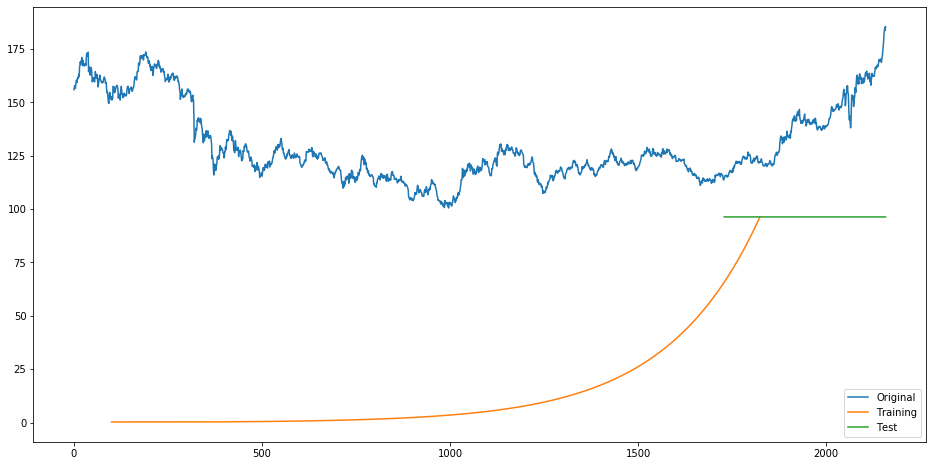

In [27]:
# shift train predictions for plotting
look_back=100
trainPredictPlot_ma = numpy.empty_like(data_scaled)
trainPredictPlot_ma[:, :] = np.nan
trainPredictPlot_ma[look_back:len(train_pred_ma)+look_back, :] = train_pred_ma
# shift test predictions for plotting
testPredictPlot_ma = numpy.empty_like(data_scaled)
testPredictPlot_ma[:, :] = numpy.nan
testPredictPlot_ma[len(train_pred_ma)+(look_back*2)-196:len(data_scaled)+100, :] = test_pred_ma
# plot baseline and predictions
plt.figure(figsize = (16,8))
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot_ma)
plt.plot(testPredictPlot_ma)
plt.legend(['Original','Training', 'Test'])
plt.show()

In [28]:
#Regression coefficients
x_train_lr = x_train
y_train_lr = y_train
x_test_lr = x_test
y_test_lr = y_test

In [29]:
x_train_lr

array([[0.75803581],
       [0.76884156],
       [0.78347693],
       ...,
       [0.2170702 ],
       [0.21255643],
       [0.21241962]])

In [30]:
x_train_lr =x_train_lr.reshape(x_train_lr.shape[0], 1)
x_test_lr = x_test_lr.reshape(x_test_lr.shape[0], 1)
y_train_lr =y_train_lr.reshape(y_train_lr.shape[0], 1)
y_test_lr = y_test_lr.reshape(y_test_lr.shape[0], 1)

In [31]:
x_train_lr

array([[0.75803581],
       [0.76884156],
       [0.78347693],
       ...,
       [0.2170702 ],
       [0.21255643],
       [0.21241962]])

In [32]:
y_train_lr

array([[0.76884156],
       [0.78347693],
       [0.77554365],
       ...,
       [0.21255643],
       [0.21241962],
       [0.20900012]])

In [33]:
print(x_train_lr.shape), print(y_train_lr.shape)

(1725, 1)
(1725, 1)


(None, None)

In [34]:
print(x_test_lr.shape), print(y_test_lr.shape)


(430, 1)
(430, 1)


(None, None)

In [35]:
x_train_lr.shape, x_test_lr.shape

((1725, 1), (430, 1))

In [36]:
x_train_lr

array([[0.75803581],
       [0.76884156],
       [0.78347693],
       ...,
       [0.2170702 ],
       [0.21255643],
       [0.21241962]])

In [37]:
#Create models
#Create decision tree model
#modeltree = DecisionTreeRegressor()
#modeltree.fit(x_train, y_train)

#Create linear regression model
modellr = LinearRegression()
modellr.fit(x_train_lr, y_train_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(modellr.coef_)))
# The Intercept
print('Intercept: ', modellr.intercept_)

Slope:  0.9968814488260845
Intercept:  [0.00082801]


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  from ipykernel import kernelapp as app


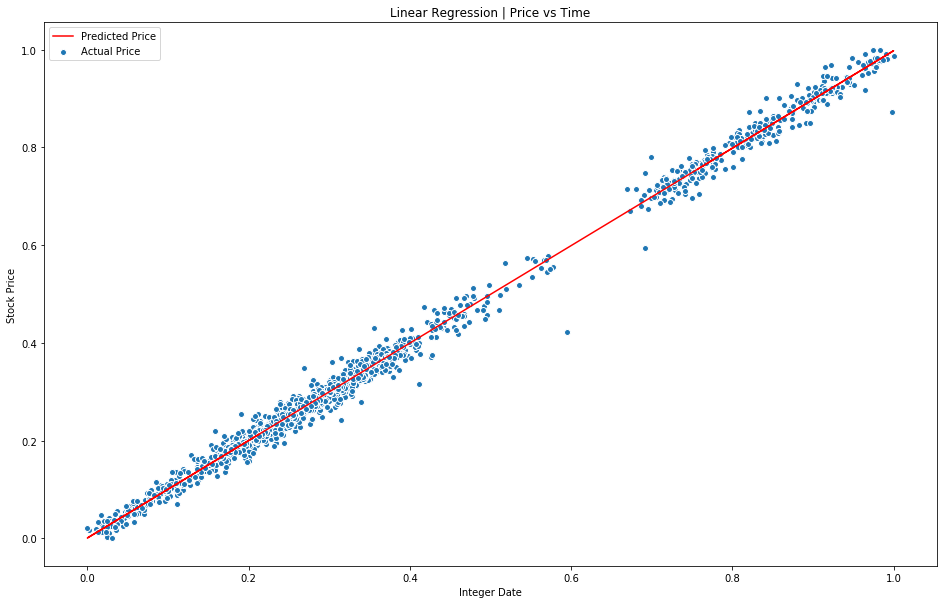

In [39]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(x_train_lr, y_train_lr, edgecolor='w', label='Actual Price')
plt.plot(x_train_lr, modellr.predict(x_train_lr), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [40]:
# Generate array with predicted values
train_pred_lr = modellr.predict(x_train_lr)
test_pred_lr = modellr.predict(x_test_lr)

In [41]:
x_train_lr=scaler.inverse_transform(x_train_lr)
x_test_lr=scaler.inverse_transform(x_test_lr)
y_train_lr=scaler.inverse_transform(y_train_lr)
y_test_lr=scaler.inverse_transform(y_test_lr)
train_pred_lr=scaler.inverse_transform(train_pred_lr)
test_pred_lr=scaler.inverse_transform(test_pred_lr)

In [42]:
print(x_train_lr)
print(train_pred_lr)

[[164.87997537]
 [165.79770782]
 [167.04068987]
 ...
 [118.93577084]
 [118.55241626]
 [118.54079704]]
[[164.74952601]
 [165.66439646]
 [166.9035022 ]
 ...
 [118.94860082]
 [118.56644176]
 [118.55485878]]


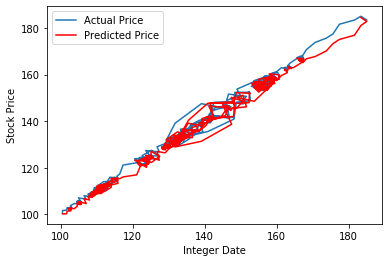

In [45]:
plt.plot(x_test_lr, y_test_lr,  label='Actual Price')
plt.plot(y_test_lr, modellr.predict(x_test_lr), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [44]:
### Calculate RMSE performance metrics

print("Test Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_test_lr, modellr.predict(x_test_lr)))))
print("Test Linear Regression Mean Squared error is {}".format(mean_squared_error(y_test_lr, modellr.predict(x_test_lr))))


Test Linear Regression Root Mean Squared error is:1.7157370632026676
Test Linear Regression Mean Squared error is 2.9437536700473146


In [43]:
print(x_test_lr.shape) 
print(train_pred_lr.shape)
print(x_train_lr.shape)
print(test_pred_lr.shape)

(430, 1)
(1725, 1)
(1725, 1)
(430, 1)


In [44]:
###LSTM CODE BELOW

In [45]:
#LSTM coefficients
x_train_lstm = x_train
y_train_lstm = y_train
x_test_lstm = x_test
y_test_lstm = y_test

In [46]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train_lstm =x_train_lstm.reshape(x_train_lstm.shape[0],x_train_lstm.shape[1] , 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0],x_test_lstm.shape[1] , 1)

In [47]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, Activation
from sklearn.metrics import r2_score


In [48]:
def model_funt(layer):
        model_1=Sequential()
        model_1.add(LSTM(layer[0],return_sequences=True,input_shape=(5,1)))
        model_1.add(Dropout(0.3))
        model_1.add(LSTM(layer[1]))
        model_1.add(Dense(layer[2]))
        model_1.add(Activation("linear"))
        
        return model_1

Epoch 1/50
27/27 [==============================] - 1s 31ms/step - loss: 0.1040 - val_loss: 0.0864
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0770 - val_loss: 0.0632
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0565 - val_loss: 0.0461
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.0347
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0317 - val_loss: 0.0277
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 0.0242
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.0227
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.0217
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0216 - val_loss: 0.0208
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.0197
Epoch 11/50
27/27 

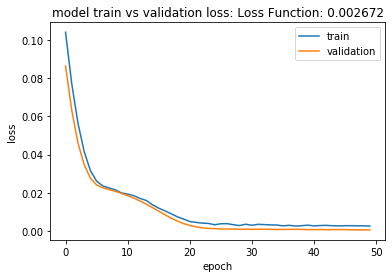

Epoch 1/50
27/27 [==============================] - 1s 30ms/step - loss: 0.1002 - val_loss: 0.0855
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0782 - val_loss: 0.0660
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0605 - val_loss: 0.0503
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0457 - val_loss: 0.0384
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0353 - val_loss: 0.0295
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.0240
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.0209
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.0193
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.0184
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.0177
Epoch 11/50
27/27 

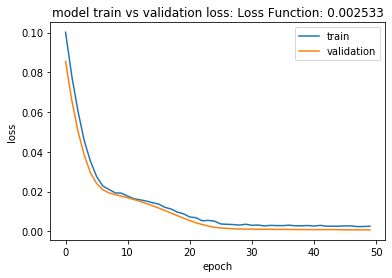

Epoch 1/50
27/27 [==============================] - 1s 30ms/step - loss: 0.0833 - val_loss: 0.0462
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0251 - val_loss: 0.0139
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0074
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 7.9663e-04
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 9.8231e-04 - val_loss: 6.1237e-04
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 8.9178e-04 - val_loss: 5.2981e-04
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 9.1193e-04 - val_loss: 5

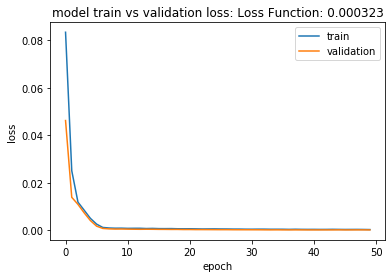

Epoch 1/50
27/27 [==============================] - 1s 30ms/step - loss: 0.1006 - val_loss: 0.0853
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0770 - val_loss: 0.0648
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0578 - val_loss: 0.0486
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0440 - val_loss: 0.0365
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0330 - val_loss: 0.0281
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0230
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.0203
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0196 - val_loss: 0.0190
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0181
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.0173
Epoch 11/50
27/27 

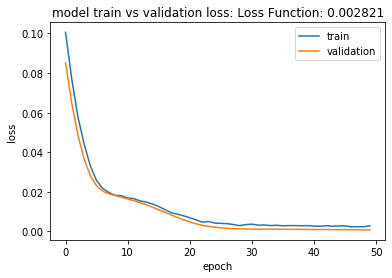

Epoch 1/50
27/27 [==============================] - 1s 29ms/step - loss: 0.1062 - val_loss: 0.0875
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0766 - val_loss: 0.0617
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0544 - val_loss: 0.0442
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0330
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.0266
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0251 - val_loss: 0.0234
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.0217
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.0206
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0195
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.0182
Epoch 11/50
27/27 

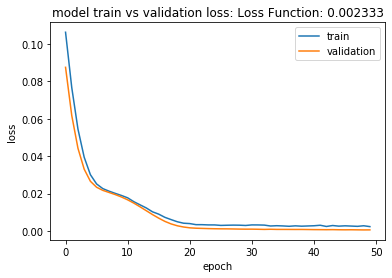

Epoch 1/50
27/27 [==============================] - 1s 30ms/step - loss: 0.1050 - val_loss: 0.0897
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0823 - val_loss: 0.0704
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0651 - val_loss: 0.0555
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0513 - val_loss: 0.0441
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0410 - val_loss: 0.0355
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0330 - val_loss: 0.0294
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.0255
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0231
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.0218
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.0208
Epoch 11/50
27/27 

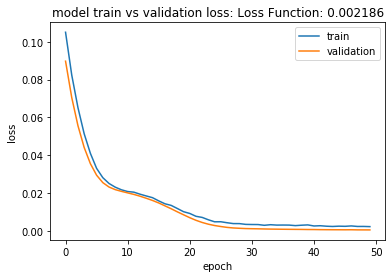

Epoch 1/50
27/27 [==============================] - 1s 30ms/step - loss: 0.1010 - val_loss: 0.0852
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0778 - val_loss: 0.0650
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0604 - val_loss: 0.0504
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0473 - val_loss: 0.0400
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0330
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0324 - val_loss: 0.0283
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.0253
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0235
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0238 - val_loss: 0.0223
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0230 - val_loss: 0.0215
Epoch 11/50
27/27 

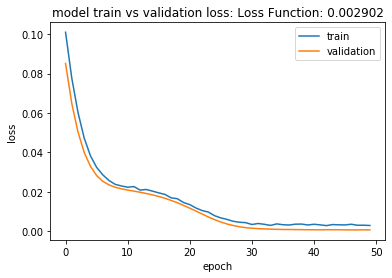

Epoch 1/50
27/27 [==============================] - 1s 30ms/step - loss: 0.0996 - val_loss: 0.0796
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0681 - val_loss: 0.0527
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0434 - val_loss: 0.0326
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0.0213
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0173
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.0158
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.0141
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0122
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.0101
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 11/50
27/27 

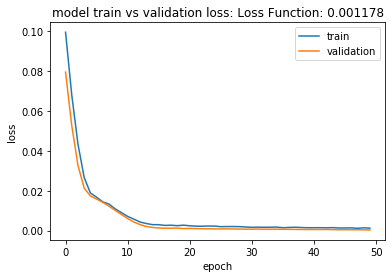

Epoch 1/50
27/27 [==============================] - 1s 31ms/step - loss: 0.0695 - val_loss: 0.0228
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.0109
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0060
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 9.9233e-04 - val_loss: 5.6612e-04
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 5.7916e-04 - val_loss: 3.6805e-04
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 5.7726e-04 - val_loss: 3.7112e-04
Epoch 8/50
27/27 [==============================] - 0s 5ms/step - loss: 5.4525e-04 - val_loss: 3.9842e-04
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 5.2678e-04 - val_loss: 3.8029e-04
Epoch 10/50
27/27 [==============================] - 0s 5ms/step - loss: 5.48

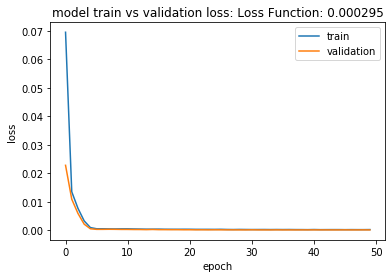

Epoch 1/75
27/27 [==============================] - 1s 29ms/step - loss: 0.1027 - val_loss: 0.0887
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0819 - val_loss: 0.0698
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0637 - val_loss: 0.0531
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0474 - val_loss: 0.0389
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0348 - val_loss: 0.0286
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0256 - val_loss: 0.0224
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0214 - val_loss: 0.0198
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0185
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.0175
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0164
Epoch 11/75
27/27 

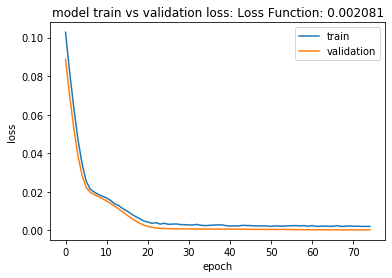

Epoch 1/75
27/27 [==============================] - 1s 42ms/step - loss: 0.1066 - val_loss: 0.0942
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0887 - val_loss: 0.0776
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0724 - val_loss: 0.0626
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0576 - val_loss: 0.0492
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0447 - val_loss: 0.0376
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0341 - val_loss: 0.0290
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0264 - val_loss: 0.0237
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.0214
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.0204
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.0197
Epoch 11/75
27/27 

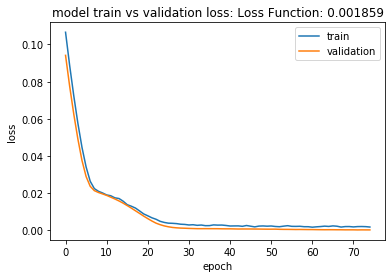

Epoch 1/75
27/27 [==============================] - 1s 30ms/step - loss: 0.0794 - val_loss: 0.0423
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0220 - val_loss: 0.0127
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0099
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0065
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 7.5864e-04
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 9.6726e-04 - val_loss: 5.8353e-04
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 9.3627e-04 - val_loss: 5.2891e-04
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 9.7634e-04 - val_loss: 5

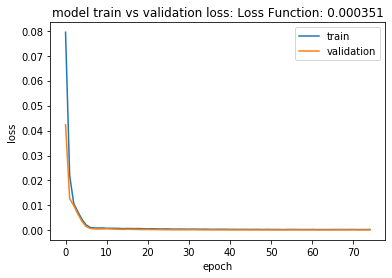

Epoch 1/75
27/27 [==============================] - 1s 53ms/step - loss: 0.0987 - val_loss: 0.0819
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0726 - val_loss: 0.0600
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0533 - val_loss: 0.0436
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0320
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0287 - val_loss: 0.0245
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.0204
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0187 - val_loss: 0.0183
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.0172
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.0162
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.0153
Epoch 11/75
27/27 

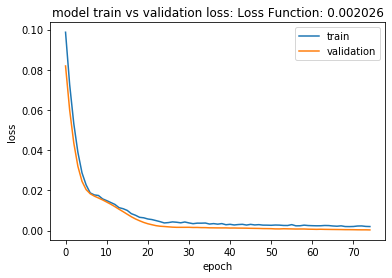

Epoch 1/75
27/27 [==============================] - 1s 31ms/step - loss: 0.1007 - val_loss: 0.0818
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0716 - val_loss: 0.0574
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0502 - val_loss: 0.0402
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0352 - val_loss: 0.0291
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.0231
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0214 - val_loss: 0.0201
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.0188
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.0178
Epoch 9/75
27/27 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0166
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.0154
Epoch 11/75
27/27 

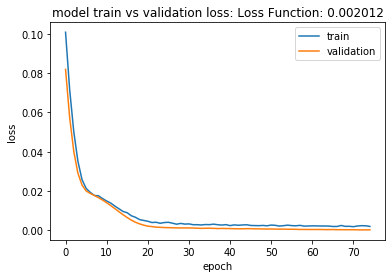

Epoch 1/75
27/27 [==============================] - 1s 30ms/step - loss: 0.1102 - val_loss: 0.0963
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0886 - val_loss: 0.0752
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0697 - val_loss: 0.0594
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0554 - val_loss: 0.0476
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0443 - val_loss: 0.0385
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0359 - val_loss: 0.0319
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0302 - val_loss: 0.0275
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0265 - val_loss: 0.0248
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0240 - val_loss: 0.0232
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.0222
Epoch 11/75
27/27 

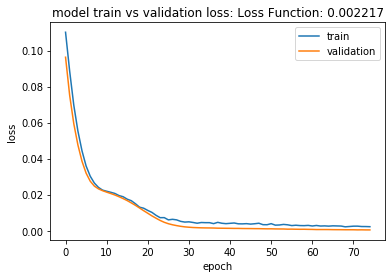

Epoch 1/75
27/27 [==============================] - 1s 29ms/step - loss: 0.1086 - val_loss: 0.0979
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0942 - val_loss: 0.0846
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0814 - val_loss: 0.0729
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0699 - val_loss: 0.0622
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0593 - val_loss: 0.0527
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.0440
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0418 - val_loss: 0.0368
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0350 - val_loss: 0.0313
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0302 - val_loss: 0.0274
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0273 - val_loss: 0.0250
Epoch 11/75
27/27 

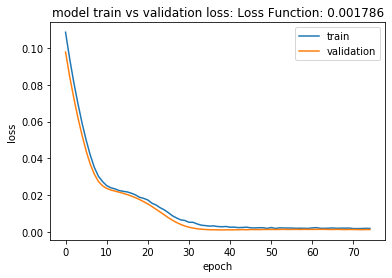

Epoch 1/75
27/27 [==============================] - 1s 30ms/step - loss: 0.0990 - val_loss: 0.0790
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0672 - val_loss: 0.0519
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0427 - val_loss: 0.0319
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.0205
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.0165
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.0150
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.0133
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0076
Epoch 11/75
27/27 

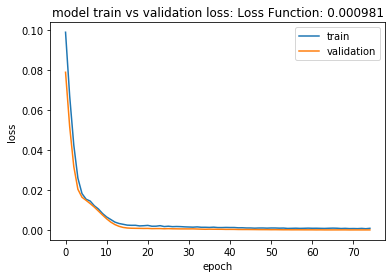

Epoch 1/75
27/27 [==============================] - 1s 31ms/step - loss: 0.0642 - val_loss: 0.0190
Epoch 2/75
27/27 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.0103
Epoch 3/75
27/27 [==============================] - 0s 5ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 4/75
27/27 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 5/75
27/27 [==============================] - 0s 4ms/step - loss: 8.9419e-04 - val_loss: 4.4620e-04
Epoch 6/75
27/27 [==============================] - 0s 4ms/step - loss: 5.6942e-04 - val_loss: 3.4674e-04
Epoch 7/75
27/27 [==============================] - 0s 5ms/step - loss: 5.7995e-04 - val_loss: 3.9641e-04
Epoch 8/75
27/27 [==============================] - 0s 5ms/step - loss: 5.5259e-04 - val_loss: 3.5259e-04
Epoch 9/75
27/27 [==============================] - 0s 5ms/step - loss: 5.1871e-04 - val_loss: 4.1918e-04
Epoch 10/75
27/27 [==============================] - 0s 5ms/step - loss: 5.44

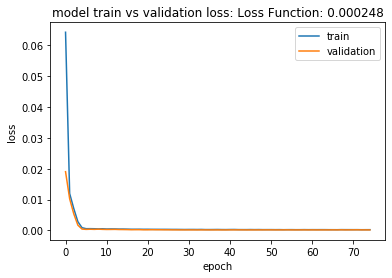

Epoch 1/100
27/27 [==============================] - 1s 31ms/step - loss: 0.0941 - val_loss: 0.0784
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0700 - val_loss: 0.0573
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0508 - val_loss: 0.0410
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0362 - val_loss: 0.0297
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.0223
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0207 - val_loss: 0.0187
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.0168
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0157
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.0148
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.0138
Epoch 11

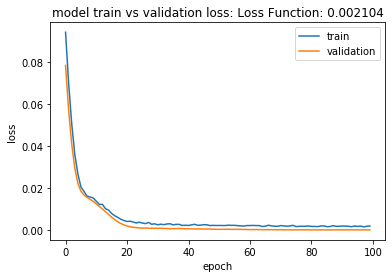

Epoch 1/100
27/27 [==============================] - 1s 29ms/step - loss: 0.1043 - val_loss: 0.0893
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0817 - val_loss: 0.0689
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0627 - val_loss: 0.0520
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0469 - val_loss: 0.0390
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0351 - val_loss: 0.0295
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0271 - val_loss: 0.0238
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0221 - val_loss: 0.0208
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.0195
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.0186
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0179
Epoch 11

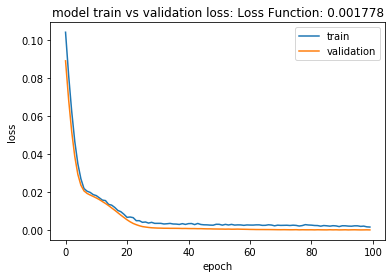

Epoch 1/100
27/27 [==============================] - 1s 31ms/step - loss: 0.0801 - val_loss: 0.0437
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0234 - val_loss: 0.0133
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0104
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0070
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 7.3637e-04
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 9.7952e-04 - val_loss: 6.1577e-04
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 9.2613e-04 - val_loss: 5.5922e-04
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - loss: 8.7874e-04 - v

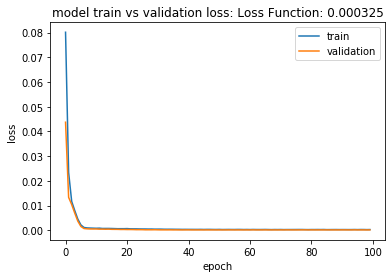

Epoch 1/100
27/27 [==============================] - 1s 29ms/step - loss: 0.1017 - val_loss: 0.0828
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0730 - val_loss: 0.0588
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.0426
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0380 - val_loss: 0.0318
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.0256
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.0223
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.0208
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0207 - val_loss: 0.0198
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.0188
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0179
Epoch 11

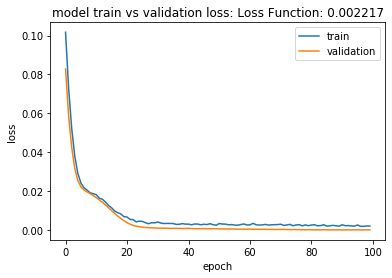

Epoch 1/100
27/27 [==============================] - 1s 30ms/step - loss: 0.1038 - val_loss: 0.0865
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0773 - val_loss: 0.0640
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0570 - val_loss: 0.0468
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.0346
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0309 - val_loss: 0.0267
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0245 - val_loss: 0.0226
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0212 - val_loss: 0.0208
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0196
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.0183
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.0169
Epoch 11

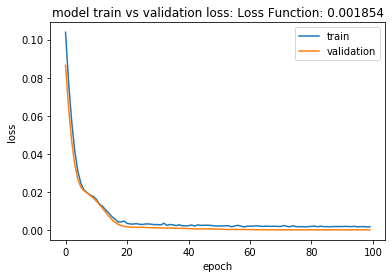

Epoch 1/100
27/27 [==============================] - 1s 30ms/step - loss: 0.1088 - val_loss: 0.0970
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0927 - val_loss: 0.0826
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0791 - val_loss: 0.0705
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0674 - val_loss: 0.0599
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0572 - val_loss: 0.0507
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0481 - val_loss: 0.0424
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0355
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0335 - val_loss: 0.0299
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.0259
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0236
Epoch 11

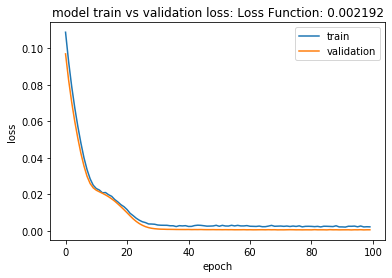

Epoch 1/100
27/27 [==============================] - 1s 31ms/step - loss: 0.1039 - val_loss: 0.0897
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0829 - val_loss: 0.0712
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0658 - val_loss: 0.0563
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0525 - val_loss: 0.0447
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0418 - val_loss: 0.0358
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0336 - val_loss: 0.0294
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.0250
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0224
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0223 - val_loss: 0.0207
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.0196
Epoch 11

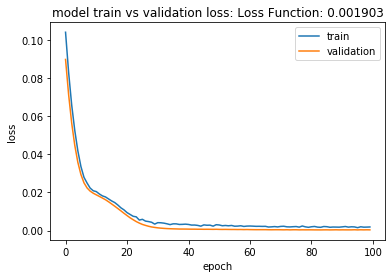

Epoch 1/100
27/27 [==============================] - 1s 30ms/step - loss: 0.0934 - val_loss: 0.0716
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0587 - val_loss: 0.0429
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.0251
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0208 - val_loss: 0.0174
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0154
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.0139
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.0123
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.0105
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0087
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0069
Epoch 11

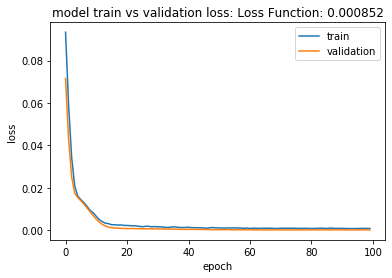

Epoch 1/100
27/27 [==============================] - 1s 33ms/step - loss: 0.0697 - val_loss: 0.0236
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0132 - val_loss: 0.0114
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.0062
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 9.9936e-04 - val_loss: 5.6825e-04
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 5.9878e-04 - val_loss: 3.7442e-04
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 5.9557e-04 - val_loss: 4.0341e-04
Epoch 8/100
27/27 [==============================] - 0s 5ms/step - loss: 5.2613e-04 - val_loss: 3.7520e-04
Epoch 9/100
27/27 [==============================] - 0s 5ms/step - loss: 5.8035e-04 - val_loss: 3.5550e-04
Epoch 10/100
27/27 [==============================] - 0s 5ms/step - 

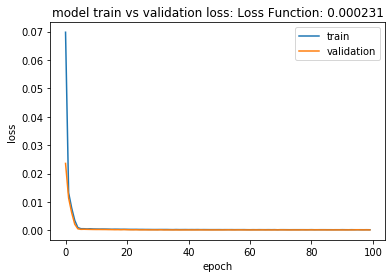

In [49]:
#model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),epochs=50,batch_size=64,verbose=1)
epochs =[50, 75, 100]

layers = [[4,5,1], [4,4,1], [50,50,1], [4,3,1], [4,6,1], [4,2,1], [4,1,1], [10,10,1], [100,100,1]]
model = 1
final_model = None
max = -100000
for epoch in epochs:
    for layer in layers:
        model_1 = model_funt(layer)
        model_1.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
        history = model_1.fit(x_train_lstm, y_train_lstm, validation_data=(x_test_lstm,y_test_lstm), 
                              epochs=epoch,batch_size=64,verbose=1)
        train_pred_lstm = model_1.predict(x_train_lstm)
        print (model, " mean is: ", np.mean(train_pred_lstm), " variance is: ", np.var(train_pred_lstm))
        if(max < (r2_score(y_train_lstm, train_pred_lstm))):
            max = r2_score(y_train_lstm, train_pred_lstm)
            final_model = model_1
            final_epoch = epoch
            final_layers = layers
        
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model train vs validation loss')
        plt.title('model train vs validation loss: Loss Function: ' + str(round(history.history['loss'][-1], 6)))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper right')
        plt.show()


In [50]:
final_model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 5, 100)            40800     
_________________________________________________________________
dropout_26 (Dropout)         (None, 5, 100)            0         
_________________________________________________________________
lstm_53 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_26 (Activation)   (None, 1)                 0         
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


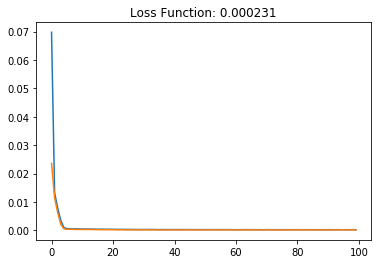

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function: ' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [52]:
print(final_layers)
print(final_epoch)

[[4, 5, 1], [4, 4, 1], [50, 50, 1], [4, 3, 1], [4, 6, 1], [4, 2, 1], [4, 1, 1], [10, 10, 1], [100, 100, 1]]
100


In [53]:
### Lets Do the prediction and check performance metrics
train_pred_lstm=final_model.predict(x_train_lstm)
test_pred_lstm=final_model.predict(x_test_lstm)

In [54]:
##Transformback to original form
train_pred_lstm=scaler.inverse_transform(train_pred_lstm)
test_pred_lstm=scaler.inverse_transform(test_pred_lstm)


In [55]:
# reshape input to be [samples, time steps, features] which is required for LSTM
y_train_lstm =y_train_lstm.reshape(y_train_lstm.shape[0], 1)
y_test_lstm = y_test_lstm.reshape(y_test_lstm.shape[0], 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0], 1)

y_train_lstm=scaler.inverse_transform(y_train_lstm)
y_test_lstm=scaler.inverse_transform(y_test_lstm)
x_test_lstm=scaler.inverse_transform(x_test_lstm)

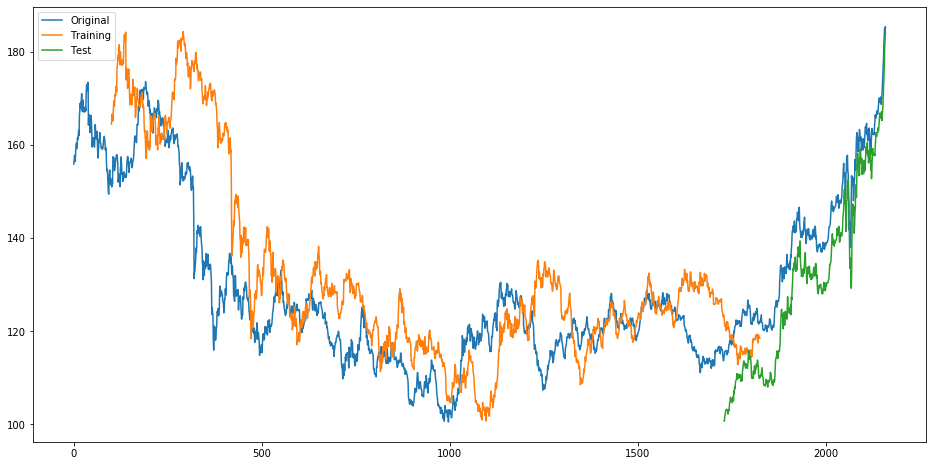

In [56]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred_lstm)+look_back, :] = train_pred_lstm
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred_lstm)+(look_back*2)-196:len(data)+100, :] = test_pred_lstm
# plot baseline and predictions
plt.figure(figsize = (16,8))
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','Training', 'Test'])
plt.show()

In [57]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print("Training Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_train_lstm,train_pred_lstm))))
print("Traning Linear Regression Mean Squared error is {}".format(mean_squared_error(y_train_lstm,train_pred_lstm)))

Training Linear Regression Root Mean Squared error is:1.4424520362457962
Traning Linear Regression Mean Squared error is 2.0806678768696436


In [58]:
### Test Data RMSE
print("Test Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_test_lstm,test_pred_lstm))))
print("Test Linear Regression Mean Squared error is {}".format(mean_squared_error(y_test_lstm,test_pred_lstm)))


Test Linear Regression Root Mean Squared error is:1.6460655891280322
Test Linear Regression Mean Squared error is 2.709531923711416


In [59]:
test_pred_lstm =test_pred_lstm.reshape(test_pred_lstm.shape[0], 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0], 1)
# y_train_lr =y_train_lr.reshape(y_train_lr.shape[0], 1)
# y_test_lr = y_test_lr.reshape(y_test_lr.shape[0], 1)

In [60]:
len(data_scaled)
data_scaled

array([[0.65253742],
       [0.6618393 ],
       [0.67443782],
       ...,
       [0.99646782],
       [0.98033677],
       [1.        ]])

In [61]:
#Predicting to next 1 day data using previous 7 days
x_input=data_scaled[len(data_scaled)-1:].reshape(1,-1)
x_input.shape

(1, 1)

In [62]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
len(temp_input)

1

In [64]:
temp_input

[1.0000000000000002]

In [65]:
x_input

array([[1.]])

In [66]:
from numpy import array

lst_output=[]
n_steps=1
i=0
while(i<7):
    
    if(len(temp_input)>1):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = final_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = final_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.98780406]
2
1 day input [0.98780406]
1 day output [[0.9761846]]
2 day input [0.97618461]
2 day output [[0.9650936]]
3 day input [0.96509361]
3 day output [[0.9544889]]
4 day input [0.95448887]
4 day output [[0.9443327]]
5 day input [0.94433272]
5 day output [[0.93459123]]
6 day input [0.93459123]
6 day output [[0.92523426]]
[[0.9878040552139282], [0.976184606552124], [0.9650936126708984], [0.9544888734817505], [0.9443327188491821], [0.9345912337303162], [0.9252342581748962]]


In [67]:
day_new=np.arange(1,len(lst_output)+1)
day_pred=np.arange(len(lst_output)+1,len(lst_output)+8)

In [68]:
len(day_new)

7

In [69]:
lst_output

[[0.9878040552139282],
 [0.976184606552124],
 [0.9650936126708984],
 [0.9544888734817505],
 [0.9443327188491821],
 [0.9345912337303162],
 [0.9252342581748962]]

In [70]:
day_pred.shape

(7,)

In [71]:
tx = scaler.inverse_transform(lst_output)
tx

array([[184.39419117],
       [183.40735148],
       [182.46539346],
       [181.56473303],
       [180.7021709 ],
       [179.87482664],
       [179.08013877]])

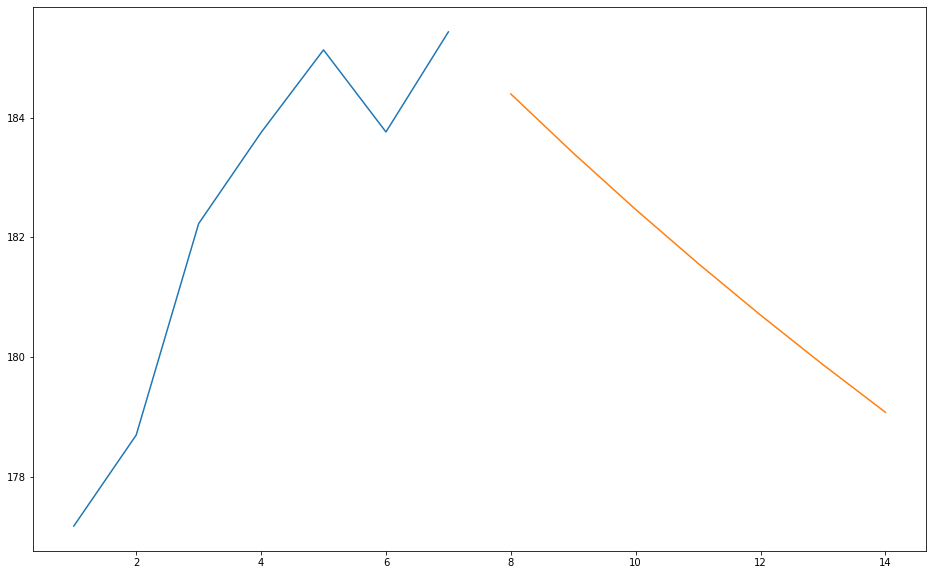

In [73]:
plt.figure(1, figsize=(16,10))
plt.plot(day_new,scaler.inverse_transform(data_scaled[len(data_scaled)-7:]))
plt.plot(day_pred,tx)

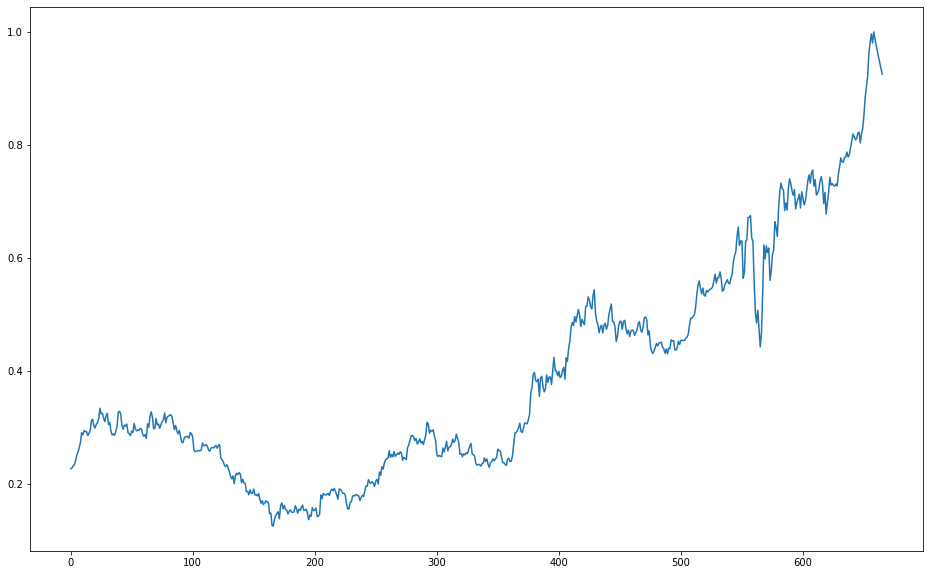

In [76]:
plt.figure(1, figsize=(16,10))
df3=data_scaled.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [77]:
df3=scaler.inverse_transform(df3).tolist()

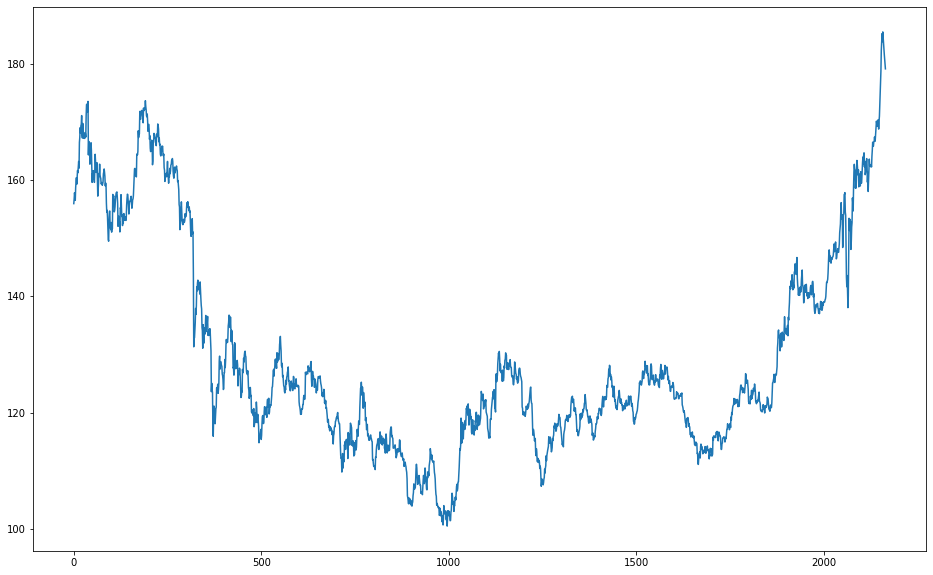

In [78]:
plt.figure(1, figsize=(16,10))
plt.plot(df3)

In [79]:
df3[-40:]

[[162.25],
 [162.55999755859375],
 [162.24000549316406],
 [164.02999877929688],
 [165.08999633789062],
 [166.47999572753906],
 [165.89999389648438],
 [165.8000030517578],
 [166.5399932861328],
 [166.6300048828125],
 [167.3699951171875],
 [166.6199951171875],
 [166.97999572753906],
 [167.97999572753906],
 [169.0399932861328],
 [170.08999633789062],
 [169.6300048828125],
 [169.19000244140625],
 [169.39999389648438],
 [170.19000244140625],
 [170.33999633789065],
 [168.72999572753906],
 [170.1199951171875],
 [170.94000244140622],
 [173.0],
 [175.63000488281253],
 [177.17999267578128],
 [178.69999694824222],
 [182.22999572753906],
 [183.75],
 [185.1300048828125],
 [183.75999450683594],
 [185.42999267578125],
 [184.39419117442594],
 [183.4073514846823],
 [182.46539345558267],
 [181.56473303391977],
 [180.70217089536163],
 [179.8748266355651],
 [179.08013877017584]]